# Modeling and Simulation in Python

Project 1: China Population Growth

Copyright 2017 MinhKhang Vu, Vienna

License: [MIT](https://opensource.org/licenses/MIT)


In [53]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

Pandas is a module that provides tools for reading and processing data.  The `read_excel` reads a web page from a file or the Internet and creates one DataFrame for each table on the page.

In [54]:
from pandas import read_excel

The data directory contains a downloaded copy of https://esa.un.org/unpd/wpp/Download/Standard/Population/

In [72]:
filename = 'data/China_Children_Population.xlsx'
table = read_excel(filename, header=0, index_col=0, decimal='M')
table

,China
Year,
1950,133905.738
1955,173459.279
1960,191450.148
1965,203813.963
1970,244721.912
1975,257087.398
1980,224364.730
1985,205464.098
1990,238151.582


`head` selects the header and the first five rows.

In [56]:
table.head()

,China
Year,
1950,188730.294
1955,228867.925
1960,260236.964
1965,296541.152
1970,332865.323


`tail` selects the last five rows.

In [10]:
table.tail()

Year,China
2096,1040720.508
2097,1035686.713
2098,1030679.993
2099,1025679.938
2100,1020665.216


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [73]:
table.columns = ['china']
china = table.china

A Series object has two parts, `values` and `index`.

The `values` part is an array.

In [36]:
china.values

array([ 188730.294,  228867.925,  260236.964,  296541.152,  332865.323,
        366261.357,  354808.347,  328597.655,  337207.968,  339933.909,
        316039.567,  262894.115,  242692.023,  247072.789])

The `index` part is yet another kind of object, an `Int64Index`.

In [37]:
china.index

Int64Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000,
            2005, 2010, 2015],
           dtype='int64', name='Year')

In [74]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    china = table.china / 1000
    
    plot(china, ':', color='darkblue', label='China Population')
    
    decorate(xlabel='Time (Year)',
             xlim=[1960, 1995],
             ylabel='Population of China (million)')

Now we can plot the estimates.

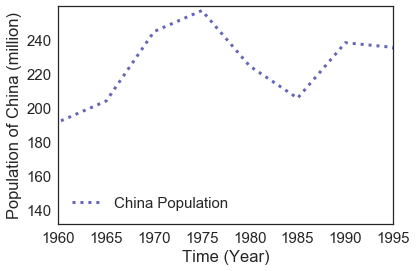

In [75]:
newfig()
plot_estimates(table)

Saving figure to file model.png


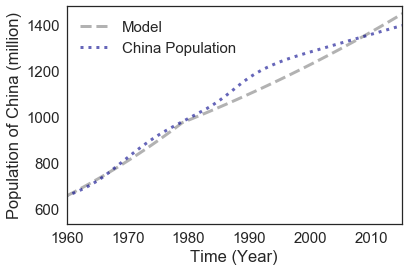

In [31]:
def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1979:
        net_growth = system.alpha1 * pop
    else:
        net_growth = system.alpha2 * pop
    return pop + net_growth

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results
    
system = System(t0=1960,
                t_end=2015,
                p0=china[1960 - 1950] / 1000,
                alpha1=0.021,
               alpha2=0.011)

run_simulation(system, update_func)
newfig()
plot(system.results, '--', color='gray', label='Model')
plot_estimates(table)
savefig('model.png', dpi=300, bbox_inches='tight')